In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

In [23]:
df = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

In [24]:
df

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3
5,1-Jun,168.5
6,1-Jul,231.8
7,1-Aug,224.5
8,1-Sep,192.8
9,1-Oct,122.9


In [25]:
# Extrair ano e mês, criar 'Date' e definir como índice
df['Year'] = df['Month'].apply(lambda x: int(x.split('-')[0]) + 2000)
df['Month_name'] = df['Month'].apply(lambda x: x.split('-')[1])
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month_name'], format='%Y%b')
df.drop('Month', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df.drop('Month_name', axis=1, inplace=True)

In [26]:
df

,Sales of shampoo over a three year period,Date
0,266.0,2001-01-01
1,145.9,2001-02-01
2,183.1,2001-03-01
3,119.3,2001-04-01
4,180.3,2001-05-01
5,168.5,2001-06-01
6,231.8,2001-07-01
7,224.5,2001-08-01
8,192.8,2001-09-01
9,122.9,2001-10-01


In [32]:
df = df.rename(columns={'Sales of shampoo over a three year period': 'Sales'})

In [108]:
df.to_csv('vendas-shampoo-tratado.csv', index=False)

In [33]:
missing_date = df['Date'].isnull().sum()
duplicate_date = df['Date'].duplicated().sum()
sorted_date = df['Date'].sort_values()

In [34]:
sorted_date.diff().max()

Timedelta('31 days 00:00:00')

In [35]:
sorted_date.diff().min()

Timedelta('28 days 00:00:00')

In [36]:
print("Missing months:", missing_date)
print("Duplicate months:", duplicate_date)

Missing months: 0
Duplicate months: 0


In [37]:
df.shape

(36, 2)

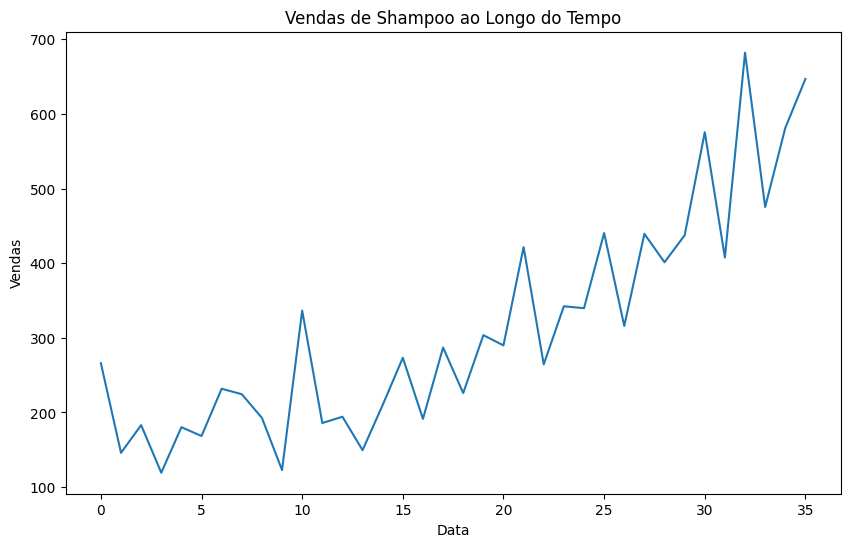

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'])
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas de Shampoo ao Longo do Tempo')
plt.show()

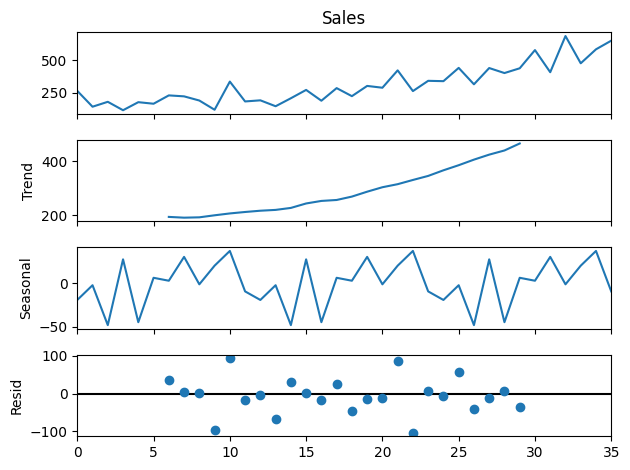

In [42]:
# Por Ano

result = seasonal_decompose(df['Sales'], model='additive', period=12)

result.plot()
plt.tight_layout()
plt.show()

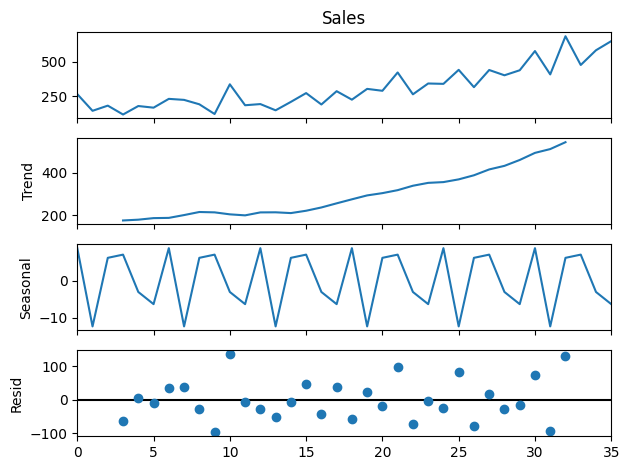

In [43]:
# Por Semestre

result = seasonal_decompose(df['Sales'], model='additive', period=6)

result.plot()
plt.tight_layout()
plt.show()

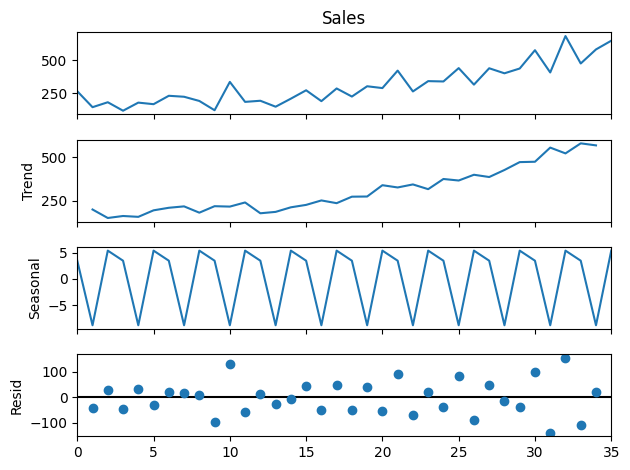

In [44]:
# Por Trimestre

result = seasonal_decompose(df['Sales'], model='additive', period=3)

result.plot()
plt.tight_layout()
plt.show()

Prevendo 1/5 dos dados finais:

In [46]:
steps = int(len(df) / 5)
steps

7

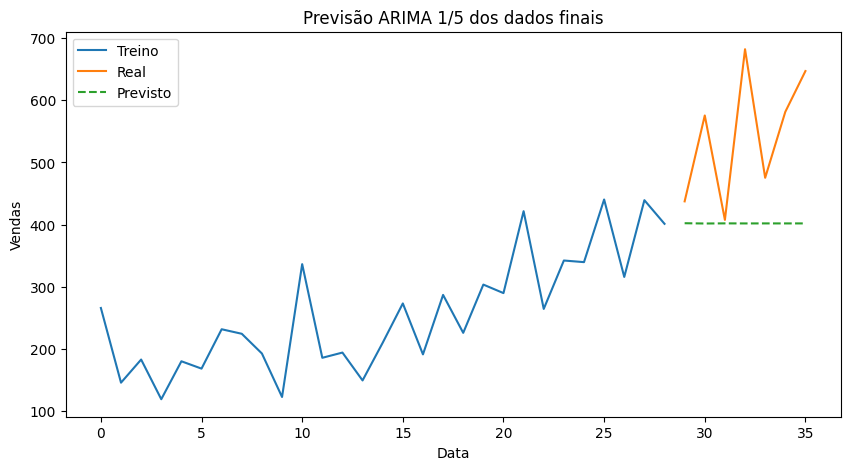

In [68]:
train_data = df.iloc[:-7]
test_data = df.iloc[-7:]

model = ARIMA(train_data['Sales'], order=(1, 1, 1))
fitted_model = model.fit()

predictions = fitted_model.forecast(steps=7)

plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Sales'], label='Treino')
plt.plot(test_data.index, test_data['Sales'], label='Real')
plt.plot(test_data.index, predictions, label='Previsto', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Previsão ARIMA 1/5 dos dados finais')
plt.legend()
plt.show()

In [58]:
steps = int(len(df) / 7)
steps

5

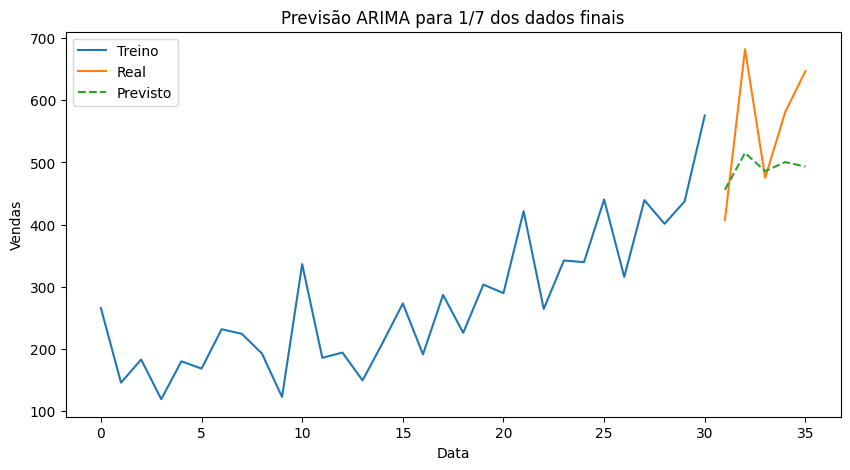

In [69]:
train_data = df.iloc[:-5]
test_data = df.iloc[-5:]

model = ARIMA(train_data['Sales'], order=(1, 1, 1))
fitted_model = model.fit()

predictions = fitted_model.forecast(steps=5)

plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['Sales'], label='Treino')
plt.plot(test_data.index, test_data['Sales'], label='Real')
plt.plot(test_data.index, predictions, label='Previsto', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Previsão ARIMA para 1/7 dos dados finais')
plt.legend()
plt.show()

In [71]:
data = df['Sales'].values
data

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [72]:
train_size = len(data) - 7
train_data, test_data = data[:train_size], data[train_size:]

In [73]:
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 3))
model_fit = model.fit(disp=False)

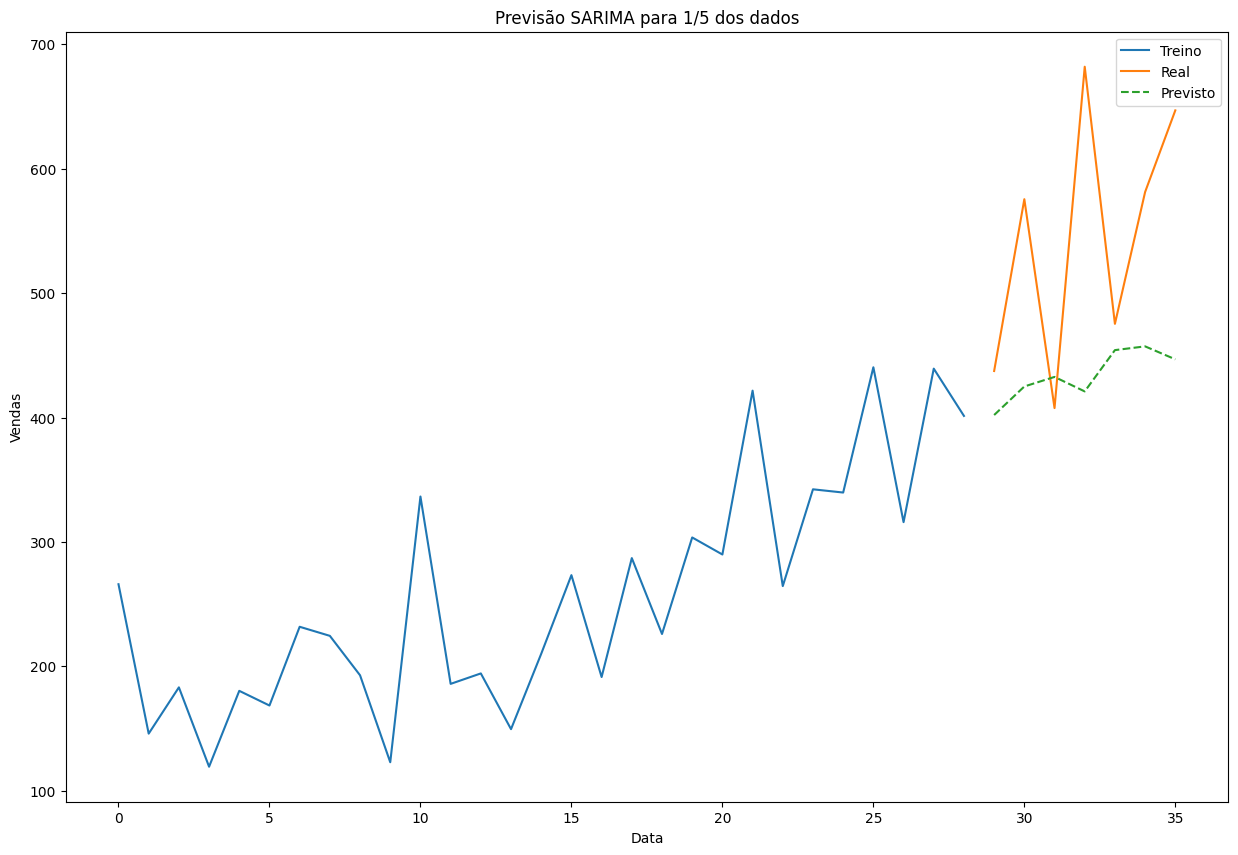

In [74]:
forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(15, 10))
plt.plot(df.index[:train_size], train_data, label='Treino')
plt.plot(df.index[train_size:], test_data, label='Real')
plt.plot(df.index[train_size:], forecast, label='Previsto', linestyle='--')
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Previsão SARIMA para 1/5 dos dados - Trimestral")
plt.legend()

plt.show()

In [77]:
data = df['Sales'].values
train_size = len(data) - 7
train_data, test_data = data[:train_size], data[train_size:]

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 6))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


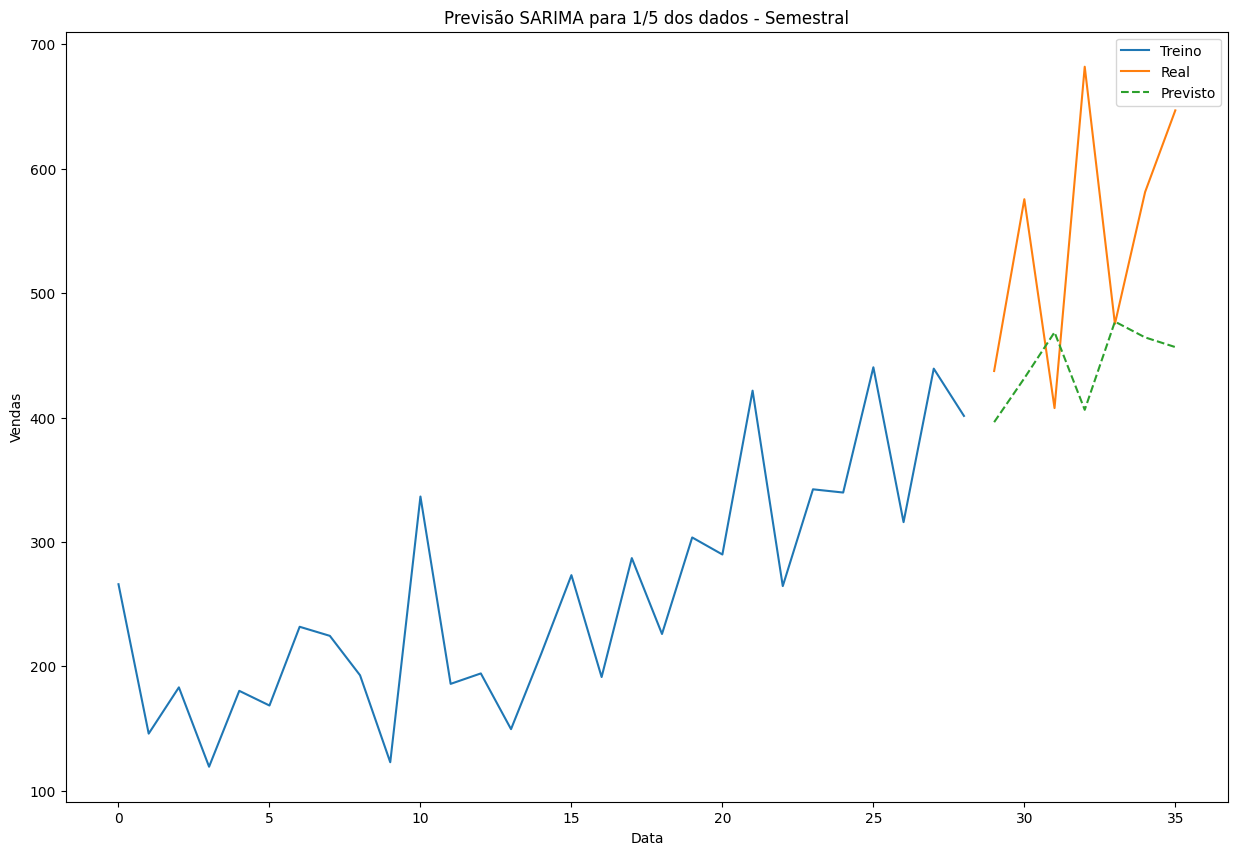

In [83]:
forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(15, 10))
plt.plot(df.index[:train_size], train_data, label='Treino')
plt.plot(df.index[train_size:], test_data, label='Real')
plt.plot(df.index[train_size:], forecast, label='Previsto', linestyle='--')
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Previsão SARIMA para 1/5 dos dados - Semestral")
plt.legend()

plt.show()

In [86]:
data = df['Sales'].values
train_size = len(data) - 7
train_data, test_data = data[:train_size], data[train_size:]

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


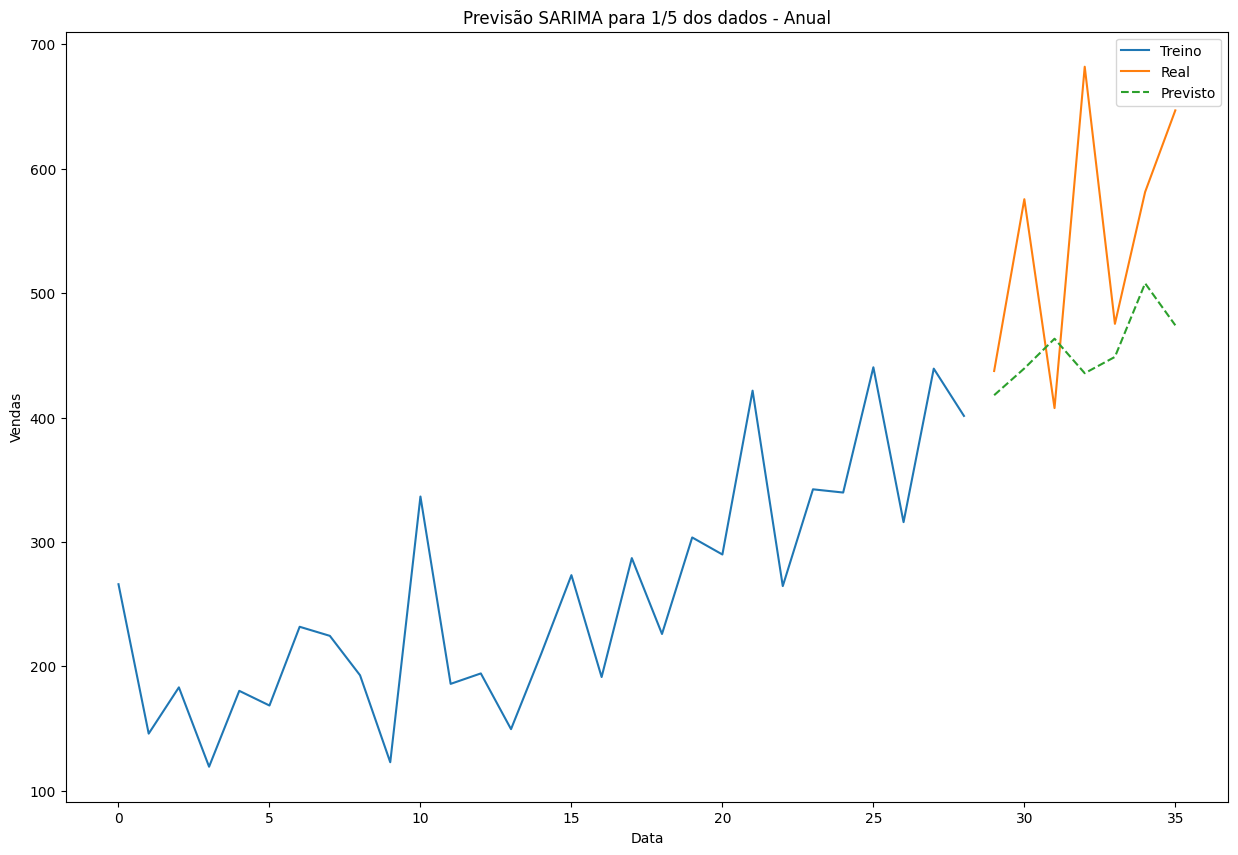

In [88]:
forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(15, 10))
plt.plot(df.index[:train_size], train_data, label='Treino')
plt.plot(df.index[train_size:], test_data, label='Real')
plt.plot(df.index[train_size:], forecast, label='Previsto', linestyle='--')
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Previsão SARIMA para 1/5 dos dados - Anual")
plt.legend()

plt.show()

In [92]:
pip install pmdarima

In [89]:
pip show pmdarima


Name: pmdarima
Version: 2.0.4
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: Cython, joblib, numpy, packaging, pandas, scikit-learn, scipy, setuptools, statsmodels, urllib3
Required-by: 


In [105]:
from pmdarima import auto_arima

# Encontrar automaticamente os melhores parâmetros
auto_model = auto_arima(train_data, seasonal=True, m=12)

order = auto_model.order
seasonal_order = auto_model.seasonal_order

model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)


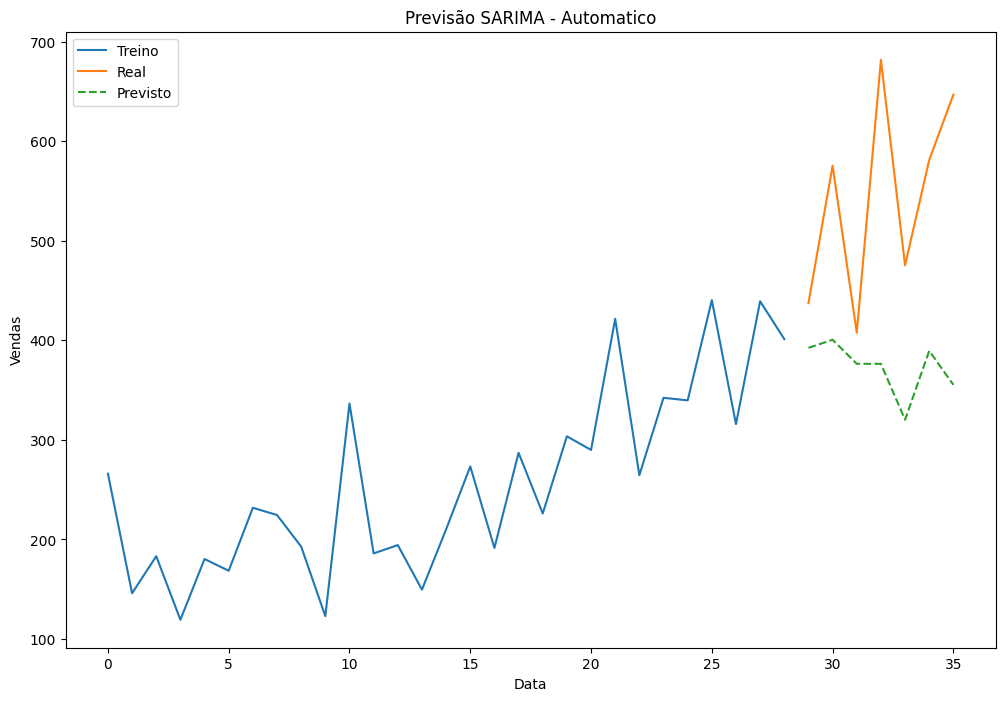

In [107]:
forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(12, 8))
plt.plot(df.index[:train_size], train_data, label='Treino')
plt.plot(df.index[train_size:], test_data, label='Real')
plt.plot(df.index[train_size:], forecast, label='Previsto', linestyle='--')
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Previsão SARIMA - Automatico")
plt.legend()

plt.show()

Ficou muito ruim!